In [2]:
import requests
import pandas as pd
import time

# Replace with your own App ID and Key
APP_ID = "b7bdde57"
APP_KEY = "91a82c2dfd58476225de855273a1bf86"

# List of job roles you want to fetch
job_roles = ["Data Scientist", "ML Engineer", "Cloud Engineer"]

# How many pages to fetch per role (each page = 50 jobs)
pages_per_role = 10  
all_jobs = []

for role in job_roles:
    print(f"Fetching jobs for: {role}")
    
    for page in range(1, pages_per_role + 1):
        # 🔹 Added salary_min=1 filter so we only get jobs with salary info
        url = f"https://api.adzuna.com/v1/api/jobs/in/search/{page}?app_id={APP_ID}&app_key={APP_KEY}&results_per_page=50&what={role}&salary_min=1"
        
        response = requests.get(url)

        if response.status_code == 200:
            data = response.json()
            results = data.get("results", [])
            
            if not results:
                print(f"⚠️ No more results for {role} on page {page}")
                break

            
            for job in results:
                all_jobs.append({
                    "Role Searched": role,
                    "Title": job.get("title"),
                    "Company": job.get("company", {}).get("display_name"),
                    "Location": job.get("location", {}).get("display_name"),
                    "Category": job.get("category", {}).get("label"),
                    "Created": job.get("created"),
                    "Description": job.get("description"),
                    "Salary_Min": job.get("salary_min"),
                    "Salary_Max": job.get("salary_max"),
                    "Salary_Is_Predicted": job.get("salary_is_predicted"),
                    "Contract_Type": job.get("contract_type"),
                    "Contract_Time": job.get("contract_time"),
                    "Redirect_URL": job.get("redirect_url")
                })
            
            print(f"✅ Page {page} fetched for {role}, total jobs so far: {len(all_jobs)}")
            time.sleep(1)  # avoid hitting rate limits
        else:
            print(f"❌ Error fetching {role} page {page}: {response.status_code}")
            break

# Convert to DataFrame
df = pd.DataFrame(all_jobs)

# Save to CSV
df.to_csv("jobs_dataset.csv", index=False, encoding="utf-8")

print("🎉 Data collection complete!")
print(f"Total jobs collected: {len(df)}")


Fetching jobs for: Data Scientist
✅ Page 1 fetched for Data Scientist, total jobs so far: 50
✅ Page 2 fetched for Data Scientist, total jobs so far: 100
✅ Page 3 fetched for Data Scientist, total jobs so far: 150
✅ Page 4 fetched for Data Scientist, total jobs so far: 200
✅ Page 5 fetched for Data Scientist, total jobs so far: 250
✅ Page 6 fetched for Data Scientist, total jobs so far: 300
✅ Page 7 fetched for Data Scientist, total jobs so far: 350
✅ Page 8 fetched for Data Scientist, total jobs so far: 400
✅ Page 9 fetched for Data Scientist, total jobs so far: 450
✅ Page 10 fetched for Data Scientist, total jobs so far: 500
Fetching jobs for: ML Engineer
✅ Page 1 fetched for ML Engineer, total jobs so far: 550
✅ Page 2 fetched for ML Engineer, total jobs so far: 600
✅ Page 3 fetched for ML Engineer, total jobs so far: 650
✅ Page 4 fetched for ML Engineer, total jobs so far: 700
✅ Page 5 fetched for ML Engineer, total jobs so far: 739
⚠️ No more results for ML Engineer on page 6
Fetch

In [3]:
df.drop_duplicates(subset=["Title", "Company", "Location", "Description"], inplace=True)


In [4]:
df.head(10)

,Role Searched,Title,Company,Location,Category,Created,Description,Salary_Min,Salary_Max,Salary_Is_Predicted,Contract_Type,Contract_Time,Redirect_URL
0,Data Scientist,Data Scientist,Time Hack Consulting,"Mumbai, Maharashtra",IT Jobs,2025-11-05T22:19:21Z,"Position: Data Scientist Location: Mumbai, Mah...",800000,2900000,0,permanent,full_time,https://www.adzuna.in/details/5482442968?utm_m...
1,Data Scientist,Data Science,Vlaunchu,"Bangalore, Karnataka",IT Jobs,2025-09-28T02:11:47Z,Project Role: AI / ML Engineer Project Role De...,1700000,2300000,0,permanent,full_time,https://www.adzuna.in/details/5418382997?utm_m...
2,Data Scientist,Data Scientist,JB Group,"Kolkata, West Bengal",IT Jobs,2025-10-19T02:26:38Z,Proven expertise in Data Science with strong P...,360000,480000,0,permanent,full_time,https://www.adzuna.in/details/5454492828?utm_m...
3,Data Scientist,Data Science,Trigent Software Private Limited,"Adugodi, Bangalore",IT Jobs,2025-11-01T06:26:50Z,4 years Experience. We are seeking an AI/ML En...,1000000,2500000,0,None,None,https://www.adzuna.in/details/5473674835?utm_m...
4,Data Scientist,Data Scientist,Acesoft Labs India Pvt,India,IT Jobs,2025-11-08T01:41:17Z,Description: Python: Proficiency in the latest...,1800000,1800000,0,None,None,https://www.adzuna.in/details/5486083915?utm_m...
5,Data Scientist,Data Scientist,UpSolve Solutions LLP,"Mumbai, Maharashtra",IT Jobs,2024-08-01T10:54:17Z,Role Description This is a full-time client fa...,300000,800000,0,None,full_time,https://www.adzuna.in/details/4803838914?utm_m...
7,Data Scientist,Data Scientist,AVE-Promagne Business Solutions LLP,"Bangalore, Karnataka",IT Jobs,2023-12-23T15:03:21Z,Job brief We are looking for a Lead Data Scien...,200000,1000000,0,None,full_time,https://www.adzuna.in/details/4493479600?utm_m...
8,Data Scientist,Data Scientist,Quenzo Tech,India,IT Jobs,2025-04-01T04:34:13Z,We are seeking an experienced Data Scientist t...,1000000,2000000,0,None,full_time,https://www.adzuna.in/details/5120471599?utm_m...
9,Data Scientist,Data Scientist,Kaplan,"Bangalore, Karnataka",IT Jobs,2021-07-14T22:44:56Z,Senior Data Scientist-Job Description The Seni...,750000,2000000,0,None,full_time,https://www.adzuna.in/details/2318122072?utm_m...
10,Data Scientist,Data Scientist,Carsome,India,IT Jobs,2021-09-16T01:20:42Z,Carsome’s Data Department is on the lookout fo...,1000000,3000000,0,None,full_time,https://www.adzuna.in/details/2461074337?utm_m...


In [5]:
df.to_excel("jobs_dataset1_cleaned.xlsx", index=False, engine="openpyxl")

In [6]:
df.shape

(1131, 13)

In [7]:
df["Description"] = df["Description"].fillna("")
df["Location"] = df["Location"].fillna("Unknown")


In [8]:
df.shape

(1131, 13)

In [9]:
df["Location"] = df["Location"].replace({
    "Bengaluru": "Bangalore",
    "Bangalore Urban": "Bangalore",
    "Hyderabad/Secunderabad": "Hyderabad"
})


In [10]:
df.drop(["Salary_Is_Predicted", "Contract_Type","Contract_Time","Redirect_URL",], axis=1, inplace=True)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1131 entries, 0 to 1227
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Role Searched  1131 non-null   object
 1   Title          1131 non-null   object
 2   Company        1131 non-null   object
 3   Location       1131 non-null   object
 4   Category       1131 non-null   object
 5   Created        1131 non-null   object
 6   Description    1131 non-null   object
 7   Salary_Min     1131 non-null   int64 
 8   Salary_Max     1131 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 88.4+ KB


In [12]:
df.head(10)

,Role Searched,Title,Company,Location,Category,Created,Description,Salary_Min,Salary_Max
0,Data Scientist,Data Scientist,Time Hack Consulting,"Mumbai, Maharashtra",IT Jobs,2025-11-05T22:19:21Z,"Position: Data Scientist Location: Mumbai, Mah...",800000,2900000
1,Data Scientist,Data Science,Vlaunchu,"Bangalore, Karnataka",IT Jobs,2025-09-28T02:11:47Z,Project Role: AI / ML Engineer Project Role De...,1700000,2300000
2,Data Scientist,Data Scientist,JB Group,"Kolkata, West Bengal",IT Jobs,2025-10-19T02:26:38Z,Proven expertise in Data Science with strong P...,360000,480000
3,Data Scientist,Data Science,Trigent Software Private Limited,"Adugodi, Bangalore",IT Jobs,2025-11-01T06:26:50Z,4 years Experience. We are seeking an AI/ML En...,1000000,2500000
4,Data Scientist,Data Scientist,Acesoft Labs India Pvt,India,IT Jobs,2025-11-08T01:41:17Z,Description: Python: Proficiency in the latest...,1800000,1800000
5,Data Scientist,Data Scientist,UpSolve Solutions LLP,"Mumbai, Maharashtra",IT Jobs,2024-08-01T10:54:17Z,Role Description This is a full-time client fa...,300000,800000
7,Data Scientist,Data Scientist,AVE-Promagne Business Solutions LLP,"Bangalore, Karnataka",IT Jobs,2023-12-23T15:03:21Z,Job brief We are looking for a Lead Data Scien...,200000,1000000
8,Data Scientist,Data Scientist,Quenzo Tech,India,IT Jobs,2025-04-01T04:34:13Z,We are seeking an experienced Data Scientist t...,1000000,2000000
9,Data Scientist,Data Scientist,Kaplan,"Bangalore, Karnataka",IT Jobs,2021-07-14T22:44:56Z,Senior Data Scientist-Job Description The Seni...,750000,2000000
10,Data Scientist,Data Scientist,Carsome,India,IT Jobs,2021-09-16T01:20:42Z,Carsome’s Data Department is on the lookout fo...,1000000,3000000


In [13]:
df["Salary_Min"] = pd.to_numeric(df["Salary_Min"], errors="coerce")
df["Salary_Max"] = pd.to_numeric(df["Salary_Max"], errors="coerce")

# Optional: create average salary column
df["Salary_Avg"] = df[["Salary_Min", "Salary_Max"]].mean(axis=1)


In [14]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', ' ', text)   # remove HTML
    text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)  # keep only alphanumeric
    text = re.sub(r'\s+', ' ', text)     # remove multiple spaces
    return text.strip()

df["Cleaned_Description"] = df["Description"].apply(clean_text)


In [15]:
df.head(10)

,Role Searched,Title,Company,Location,Category,Created,Description,Salary_Min,Salary_Max,Salary_Avg,Cleaned_Description
0,Data Scientist,Data Scientist,Time Hack Consulting,"Mumbai, Maharashtra",IT Jobs,2025-11-05T22:19:21Z,"Position: Data Scientist Location: Mumbai, Mah...",800000,2900000,1850000.0,position data scientist location mumbai mahara...
1,Data Scientist,Data Science,Vlaunchu,"Bangalore, Karnataka",IT Jobs,2025-09-28T02:11:47Z,Project Role: AI / ML Engineer Project Role De...,1700000,2300000,2000000.0,project role ai ml engineer project role descr...
2,Data Scientist,Data Scientist,JB Group,"Kolkata, West Bengal",IT Jobs,2025-10-19T02:26:38Z,Proven expertise in Data Science with strong P...,360000,480000,420000.0,proven expertise in data science with strong p...
3,Data Scientist,Data Science,Trigent Software Private Limited,"Adugodi, Bangalore",IT Jobs,2025-11-01T06:26:50Z,4 years Experience. We are seeking an AI/ML En...,1000000,2500000,1750000.0,4 years experience we are seeking an ai ml eng...
4,Data Scientist,Data Scientist,Acesoft Labs India Pvt,India,IT Jobs,2025-11-08T01:41:17Z,Description: Python: Proficiency in the latest...,1800000,1800000,1800000.0,description python proficiency in the latest v...
5,Data Scientist,Data Scientist,UpSolve Solutions LLP,"Mumbai, Maharashtra",IT Jobs,2024-08-01T10:54:17Z,Role Description This is a full-time client fa...,300000,800000,550000.0,role description this is a full time client fa...
7,Data Scientist,Data Scientist,AVE-Promagne Business Solutions LLP,"Bangalore, Karnataka",IT Jobs,2023-12-23T15:03:21Z,Job brief We are looking for a Lead Data Scien...,200000,1000000,600000.0,job brief we are looking for a lead data scien...
8,Data Scientist,Data Scientist,Quenzo Tech,India,IT Jobs,2025-04-01T04:34:13Z,We are seeking an experienced Data Scientist t...,1000000,2000000,1500000.0,we are seeking an experienced data scientist t...
9,Data Scientist,Data Scientist,Kaplan,"Bangalore, Karnataka",IT Jobs,2021-07-14T22:44:56Z,Senior Data Scientist-Job Description The Seni...,750000,2000000,1375000.0,senior data scientist job description the seni...
10,Data Scientist,Data Scientist,Carsome,India,IT Jobs,2021-09-16T01:20:42Z,Carsome’s Data Department is on the lookout fo...,1000000,3000000,2000000.0,carsome s data department is on the lookout fo...


In [16]:
df["Title_Cleaned"] = df["Title"].str.lower().str.strip()


In [17]:
def map_title_to_role(title):
    if "data scientist" in title or "Data Science" in title:
        return "Data Scientist"
    elif "ml engineer" in title or "machine learning engineer" in title:
        return "ML Engineer"
    elif "cloud engineer" in title or "cloud solutions" in title or "cloud architect" in title:
        return "Cloud Engineer"
    else:
        return "Other"  

df["Standard_Role"] = df["Title_Cleaned"].apply(map_title_to_role)


In [18]:
print(df[["Title", "Standard_Role"]].head(10))


             Title   Standard_Role
0   Data Scientist  Data Scientist
1     Data Science           Other
2   Data Scientist  Data Scientist
3     Data Science           Other
4   Data Scientist  Data Scientist
5   Data Scientist  Data Scientist
7   Data Scientist  Data Scientist
8   Data Scientist  Data Scientist
9   Data Scientist  Data Scientist
10  Data Scientist  Data Scientist


In [19]:
df.head(10)

,Role Searched,Title,Company,Location,Category,Created,Description,Salary_Min,Salary_Max,Salary_Avg,Cleaned_Description,Title_Cleaned,Standard_Role
0,Data Scientist,Data Scientist,Time Hack Consulting,"Mumbai, Maharashtra",IT Jobs,2025-11-05T22:19:21Z,"Position: Data Scientist Location: Mumbai, Mah...",800000,2900000,1850000.0,position data scientist location mumbai mahara...,data scientist,Data Scientist
1,Data Scientist,Data Science,Vlaunchu,"Bangalore, Karnataka",IT Jobs,2025-09-28T02:11:47Z,Project Role: AI / ML Engineer Project Role De...,1700000,2300000,2000000.0,project role ai ml engineer project role descr...,data science,Other
2,Data Scientist,Data Scientist,JB Group,"Kolkata, West Bengal",IT Jobs,2025-10-19T02:26:38Z,Proven expertise in Data Science with strong P...,360000,480000,420000.0,proven expertise in data science with strong p...,data scientist,Data Scientist
3,Data Scientist,Data Science,Trigent Software Private Limited,"Adugodi, Bangalore",IT Jobs,2025-11-01T06:26:50Z,4 years Experience. We are seeking an AI/ML En...,1000000,2500000,1750000.0,4 years experience we are seeking an ai ml eng...,data science,Other
4,Data Scientist,Data Scientist,Acesoft Labs India Pvt,India,IT Jobs,2025-11-08T01:41:17Z,Description: Python: Proficiency in the latest...,1800000,1800000,1800000.0,description python proficiency in the latest v...,data scientist,Data Scientist
5,Data Scientist,Data Scientist,UpSolve Solutions LLP,"Mumbai, Maharashtra",IT Jobs,2024-08-01T10:54:17Z,Role Description This is a full-time client fa...,300000,800000,550000.0,role description this is a full time client fa...,data scientist,Data Scientist
7,Data Scientist,Data Scientist,AVE-Promagne Business Solutions LLP,"Bangalore, Karnataka",IT Jobs,2023-12-23T15:03:21Z,Job brief We are looking for a Lead Data Scien...,200000,1000000,600000.0,job brief we are looking for a lead data scien...,data scientist,Data Scientist
8,Data Scientist,Data Scientist,Quenzo Tech,India,IT Jobs,2025-04-01T04:34:13Z,We are seeking an experienced Data Scientist t...,1000000,2000000,1500000.0,we are seeking an experienced data scientist t...,data scientist,Data Scientist
9,Data Scientist,Data Scientist,Kaplan,"Bangalore, Karnataka",IT Jobs,2021-07-14T22:44:56Z,Senior Data Scientist-Job Description The Seni...,750000,2000000,1375000.0,senior data scientist job description the seni...,data scientist,Data Scientist
10,Data Scientist,Data Scientist,Carsome,India,IT Jobs,2021-09-16T01:20:42Z,Carsome’s Data Department is on the lookout fo...,1000000,3000000,2000000.0,carsome s data department is on the lookout fo...,data scientist,Data Scientist


In [20]:
df = df.drop(columns=["Title"]) 

In [21]:
df.to_excel("jobs_dataset2_cleaned.xlsx", index=False, engine="openpyxl")

In [22]:
df["Role Searched"] = df["Role Searched"].astype("category")
df["Company"] = df["Company"].astype("category")
df["Location"] = df["Location"].astype("category")
df["Category"] = df["Category"].astype("category")
df["Standard_Role"] = df["Standard_Role"].astype("category")


In [23]:
bins = [0, 500000, 1000000, 2000000, 5000000, float("inf")]
labels = ["<5L", "5L-10L", "10L-20L", "20L-50L", "50L+"]
df["Salary_Range"] = pd.cut(df["Salary_Avg"], bins=bins, labels=labels)


In [24]:
df.head(10)

,Role Searched,Company,Location,Category,Created,Description,Salary_Min,Salary_Max,Salary_Avg,Cleaned_Description,Title_Cleaned,Standard_Role,Salary_Range
0,Data Scientist,Time Hack Consulting,"Mumbai, Maharashtra",IT Jobs,2025-11-05T22:19:21Z,"Position: Data Scientist Location: Mumbai, Mah...",800000,2900000,1850000.0,position data scientist location mumbai mahara...,data scientist,Data Scientist,10L-20L
1,Data Scientist,Vlaunchu,"Bangalore, Karnataka",IT Jobs,2025-09-28T02:11:47Z,Project Role: AI / ML Engineer Project Role De...,1700000,2300000,2000000.0,project role ai ml engineer project role descr...,data science,Other,10L-20L
2,Data Scientist,JB Group,"Kolkata, West Bengal",IT Jobs,2025-10-19T02:26:38Z,Proven expertise in Data Science with strong P...,360000,480000,420000.0,proven expertise in data science with strong p...,data scientist,Data Scientist,<5L
3,Data Scientist,Trigent Software Private Limited,"Adugodi, Bangalore",IT Jobs,2025-11-01T06:26:50Z,4 years Experience. We are seeking an AI/ML En...,1000000,2500000,1750000.0,4 years experience we are seeking an ai ml eng...,data science,Other,10L-20L
4,Data Scientist,Acesoft Labs India Pvt,India,IT Jobs,2025-11-08T01:41:17Z,Description: Python: Proficiency in the latest...,1800000,1800000,1800000.0,description python proficiency in the latest v...,data scientist,Data Scientist,10L-20L
5,Data Scientist,UpSolve Solutions LLP,"Mumbai, Maharashtra",IT Jobs,2024-08-01T10:54:17Z,Role Description This is a full-time client fa...,300000,800000,550000.0,role description this is a full time client fa...,data scientist,Data Scientist,5L-10L
7,Data Scientist,AVE-Promagne Business Solutions LLP,"Bangalore, Karnataka",IT Jobs,2023-12-23T15:03:21Z,Job brief We are looking for a Lead Data Scien...,200000,1000000,600000.0,job brief we are looking for a lead data scien...,data scientist,Data Scientist,5L-10L
8,Data Scientist,Quenzo Tech,India,IT Jobs,2025-04-01T04:34:13Z,We are seeking an experienced Data Scientist t...,1000000,2000000,1500000.0,we are seeking an experienced data scientist t...,data scientist,Data Scientist,10L-20L
9,Data Scientist,Kaplan,"Bangalore, Karnataka",IT Jobs,2021-07-14T22:44:56Z,Senior Data Scientist-Job Description The Seni...,750000,2000000,1375000.0,senior data scientist job description the seni...,data scientist,Data Scientist,10L-20L
10,Data Scientist,Carsome,India,IT Jobs,2021-09-16T01:20:42Z,Carsome’s Data Department is on the lookout fo...,1000000,3000000,2000000.0,carsome s data department is on the lookout fo...,data scientist,Data Scientist,10L-20L


In [25]:
df.to_excel("jobs_dataset3_cleaned.xlsx", index=True, engine="openpyxl")

**NLP**

In [26]:
!python -m venv myenv


In [27]:
!.\myenv\Scripts\activate


In [28]:
!python -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable


In [29]:
pip install spacy


Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-2.3.4-cp312-cp312-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.3.4-cp312-cp312-win_amd64.whl (12.8 MB)
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.5.2 which is incompatible.
tensorflow-intel 2.18.0 requires ml-dtypes<0.5.0,>=0.4.0, but you have ml-dtypes 0.5.3 which is incompatible.
tensorflow-intel 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.3.4 which is incompatible.
tensorflow-intel 2.18.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.3, but you have protobuf 6.32.1 which is incompatible.
tensorflow-intel 2.18.0 requires tensorboard<2.19,>=2.18, but you have tensorboard 2.20.0 which is incompatible.
ydata-profiling 4.12.2 requires imagehash==4.3.1, but you have imagehash 4.3.2 which is incompatible.
ydata-profiling 4.

In [30]:
!python -m spacy download en_core_web_sm



Defaulting to user installation because normal site-packages is not writeable
     - 0 bytes ? 0:00:00
     - 0 bytes ? 0:00:00


ERROR: Wheel 'en-core-web-sm' located at C:\Users\HP\AppData\Local\Temp\pip-unpack-jfgvufom\en_core_web_sm-3.8.0-py3-none-any.whl is invalid.


In [31]:
import spacy
nlp = spacy.load("en_core_web_sm")


In [32]:
tech_skills = [
    "python", "sql", "aws", "azure", "gcp", "tensorflow", "pytorch", "scikit-learn", 
    "spark", "hadoop", "powerbi", "tableau", "docker", "kubernetes", "linux", 
    "java", "c++", "r", "scala", "mongodb", "mysql", "nosql", "git", "jenkins", "terraform"
]


In [33]:
def extract_skills_spacy(text, skills_list):
    text = text.lower()
    doc = nlp(text)
    
    found_skills = set()
    
    # Keyword matching
    for skill in skills_list:
        if skill.lower() in text:
            found_skills.add(skill.capitalize())
    
    # Optional: Use NER to capture ORG / PRODUCT entities
    for ent in doc.ents:
        if ent.label_ in ["ORG", "PRODUCT", "LANGUAGE"]:
            if ent.text.lower() in skills_list:
                found_skills.add(ent.text.capitalize())
    
    return list(found_skills)


In [34]:
df["Extracted_Skills"] = df["Cleaned_Description"].apply(lambda x: extract_skills_spacy(x, tech_skills))


In [35]:
from collections import Counter

top_skills_per_role = {}

for role in df["Standard_Role"].unique():
    skills = df[df["Standard_Role"] == role]["Extracted_Skills"].explode()
    skill_counts = Counter(skills).most_common(10)
    top_skills_per_role[role] = skill_counts

print(top_skills_per_role)


{'Data Scientist': [('R', 268), ('Python', 62), ('Scala', 20), ('Sql', 18), ('Tensorflow', 17), ('Pytorch', 13), ('Git', 13), ('Spark', 10), ('Aws', 9), ('Hadoop', 7)], 'Other': [('R', 708), ('Scala', 117), ('Aws', 102), ('Python', 99), ('Azure', 73), ('Git', 72), ('Sql', 63), ('Java', 48), ('Gcp', 42), ('Spark', 37)], 'ML Engineer': [('R', 87), ('Python', 14), ('Tensorflow', 9), ('Pytorch', 9), ('Git', 9), ('Scala', 9), ('Sql', 5), ('Aws', 4), ('Docker', 3), ('Azure', 3)], 'Cloud Engineer': [('R', 68), ('Aws', 21), ('Azure', 15), ('Scala', 14), ('Python', 9), ('Git', 7), ('Kubernetes', 7), ('Terraform', 7), ('Gcp', 6), ('Docker', 4)]}


C:\Users\HP\AppData\Local\Temp\ipykernel_1252\147789454.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=skill_counts.values, y=skill_counts.index, palette="Blues_r")


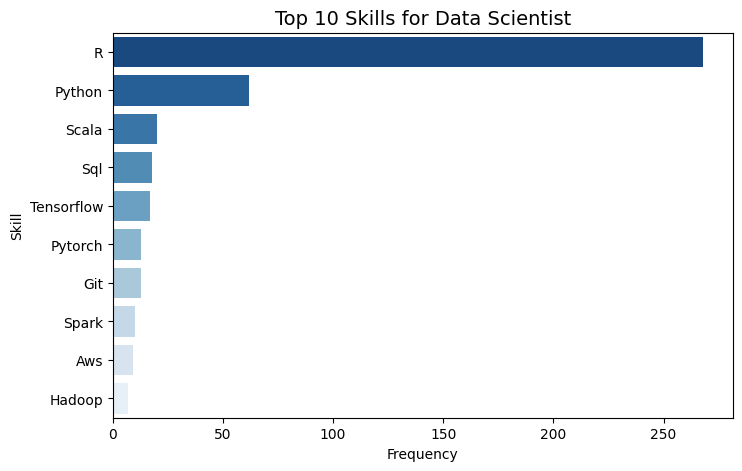

C:\Users\HP\AppData\Local\Temp\ipykernel_1252\147789454.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=skill_counts.values, y=skill_counts.index, palette="Blues_r")


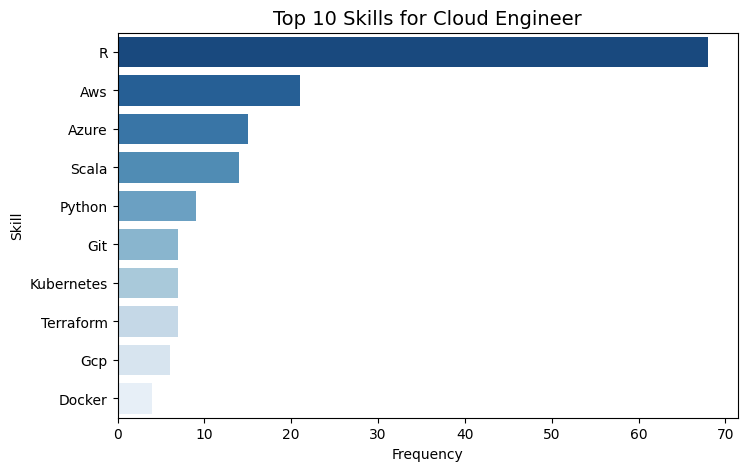

C:\Users\HP\AppData\Local\Temp\ipykernel_1252\147789454.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=skill_counts.values, y=skill_counts.index, palette="Blues_r")


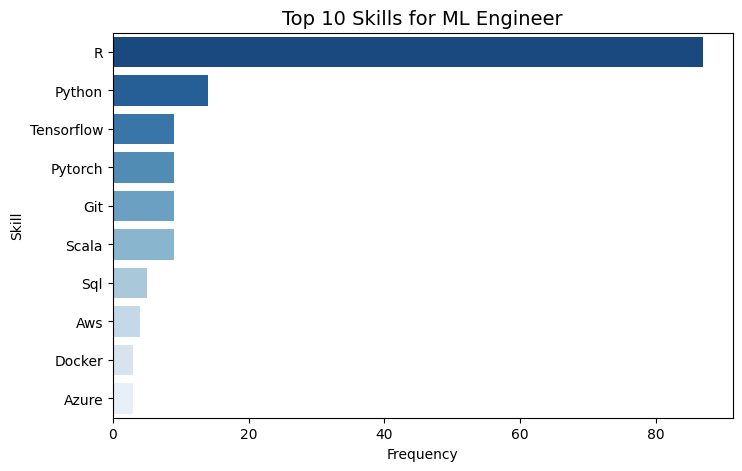

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_top_skills(role):
    skills = df[df["Standard_Role"] == role]["Extracted_Skills"].explode()
    skill_counts = skills.value_counts().head(10)

    plt.figure(figsize=(8,5))
    sns.barplot(x=skill_counts.values, y=skill_counts.index, palette="Blues_r")
    plt.title(f"Top 10 Skills for {role}", fontsize=14)
    plt.xlabel("Frequency")
    plt.ylabel("Skill")
    plt.show()

# Example usage
plot_top_skills("Data Scientist")
plot_top_skills("Cloud Engineer")
plot_top_skills("ML Engineer")

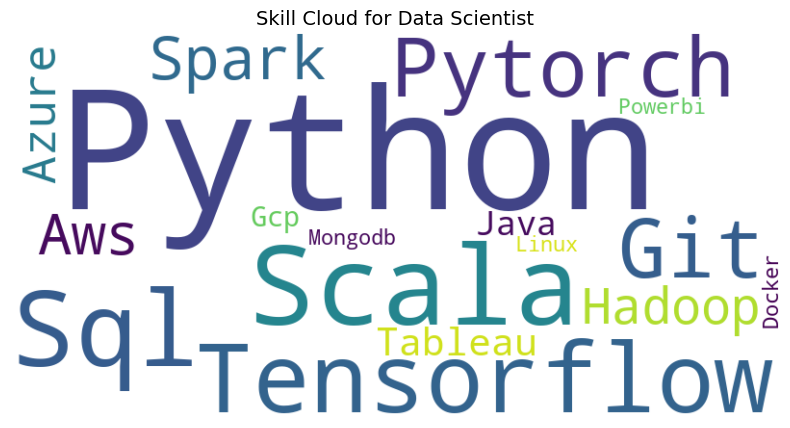

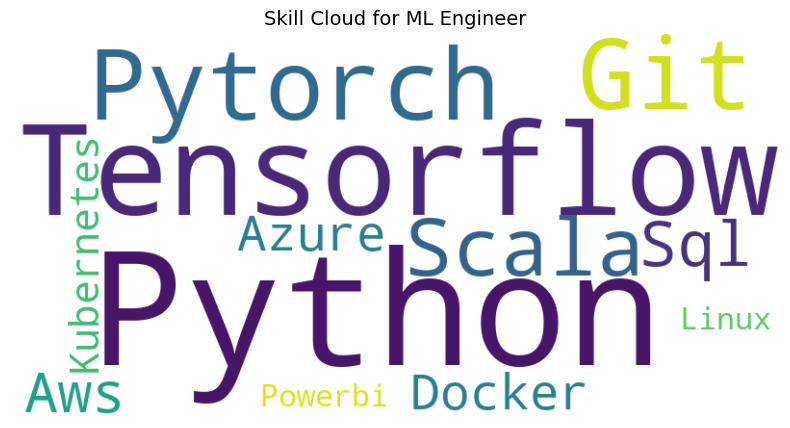

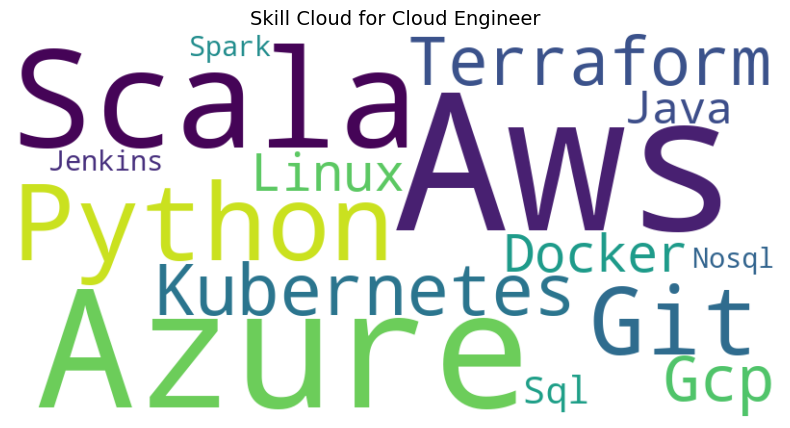

In [37]:
from wordcloud import WordCloud

def plot_wordcloud(role):
    skills = df[df["Standard_Role"] == role]["Extracted_Skills"].explode()
    text = " ".join(skills.dropna())

    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Skill Cloud for {role}", fontsize=14)
    plt.show()

# Example usage
plot_wordcloud("Data Scientist")
plot_wordcloud("ML Engineer")
plot_wordcloud("Cloud Engineer")


In [38]:
pip uninstall numpy scikit-learn -y


Found existing installation: numpy 2.3.4
Uninstalling numpy-2.3.4:
  Successfully uninstalled numpy-2.3.4
Found existing installation: scikit-learn 1.4.2
Uninstalling scikit-learn-1.4.2:
Note: you may need to restart the kernel to use updated packages.


ERROR: Exception:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\shutil.py", line 847, in move
    os.rename(src, real_dst)
PermissionError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\scikit_learn-1.4.2.dist-info\\' -> 'C:\\Users\\HP\\AppData\\Local\\Temp\\pip-uninstall-owid6iuo'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\pip\_internal\cli\base_command.py", line 107, in _run_wrapper
    status = _inner_run()
             ^^^^^^^^^^^^
  File "C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\pip\_internal\cli\base_command.py", line 98, in _inner_run
    return self.run(options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\pip\_internal\commands\uninstall.py", line 105, in run
    uninstall_pathset = req.uninstall(
              

In [39]:
!pip install numpy==1.25.0
!pip install scikit-learn==1.3.0


Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-1.25.0.tar.gz (10.4 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  Getting requirements to build wheel did not run successfully.
  exit code: 1
  
  [33 lines of output]
  Traceback (most recent call last):
    File "C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 389, in <module>
      main()
    File "C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 373, in main
      json_out["return_val"] = hook(**hook_input["kwargs"])
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 137, in get_requires_for_build_wheel
      backend = _build_backend()
                ^^^^^^^^^^^^^^^^
    File "C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 70, in _build_backend
     

Defaulting to user installation because normal site-packages is not writeable
  Using cached scikit-learn-1.3.0.tar.gz (7.5 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'error'


  error: subprocess-exited-with-error
  
  Preparing metadata (pyproject.toml) did not run successfully.
  exit code: 1
  
  [33 lines of output]
  Partial import of sklearn during the build process.
  Traceback (most recent call last):
    File "C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 389, in <module>
      main()
    File "C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 373, in main
      json_out["return_val"] = hook(**hook_input["kwargs"])
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 175, in prepare_metadata_for_build_wheel
      return hook(metadata_directory, config_settings)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\HP\AppData\Local\Temp\pip-build-env-z

In [40]:
import numpy as np
import sklearn
from sklearn.preprocessing import OneHotEncoder
print("NumPy version:", np.__version__)
print("Scikit-learn version:", sklearn.__version__)


NumPy version: 1.26.4
Scikit-learn version: 1.4.2


In [41]:
# Create a new environment named 'job_analyzer'
!conda create -n job_analyzer python=3.11 -y

# Activate it
!conda activate job_analyzer


Retrieving notices: ...working... done
Channels:
 - defaults
Platform: win-64
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\HP\.conda\envs\job_analyzer

  added / updated specs:
    - python=3.11


The following NEW packages will be INSTALLED:

  bzip2              pkgs/main/win-64::bzip2-1.0.8-h2bbff1b_6 
  ca-certificates    pkgs/main/win-64::ca-certificates-2025.11.4-haa95532_0 
  expat              pkgs/main/win-64::expat-2.7.3-h9214b88_0 
  libffi             pkgs/main/win-64::libffi-3.4.4-hd77b12b_1 
  libzlib            pkgs/main/win-64::libzlib-1.3.1-h02ab6af_0 
  openssl            pkgs/main/win-64::openssl-3.0.18-h543e019_0 
  pip                pkgs/main/noarch::pip-25.2-pyhc872135_1 
  python             pkgs/main/win-64::python-3.11.14-h981015d_0 
  setuptools         pkgs/main/win-64::setuptools-80.9.0-py311haa95532_0 
  sqlite             pkgs/main/win-64::sqlite-3.51.0-hda9a48d_0 
  tk                 pkgs/main/win-64::tk-

In [42]:
import pandas as pd

df = pd.read_csv("jobs_dataset.csv")

# Take average salary where both are available
df["Average_Salary"] = df[["Salary_Min", "Salary_Max"]].mean(axis=1)
df = df.dropna(subset=["Average_Salary"])  # remove rows without salary


In [43]:
data = df[["Title", "Location", "Description", "Average_Salary"]]



In [44]:
skills = ["python", "sql", "aws", "azure", "java", "machine learning", "deep learning", "pandas", "excel"]

for skill in skills:
    data[skill] = data["Description"].str.lower().str.contains(skill).astype(int)


C:\Users\HP\AppData\Local\Temp\ipykernel_1252\234779352.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[skill] = data["Description"].str.lower().str.contains(skill).astype(int)
C:\Users\HP\AppData\Local\Temp\ipykernel_1252\234779352.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[skill] = data["Description"].str.lower().str.contains(skill).astype(int)
C:\Users\HP\AppData\Local\Temp\ipykernel_1252\234779352.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [45]:
data["Location"] = data["Location"].fillna("Unknown").str.split(",").str[0]
data["Title"] = data["Title"].fillna("").str.lower()


C:\Users\HP\AppData\Local\Temp\ipykernel_1252\641417260.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Location"] = data["Location"].fillna("Unknown").str.split(",").str[0]
C:\Users\HP\AppData\Local\Temp\ipykernel_1252\641417260.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Title"] = data["Title"].fillna("").str.lower()


In [46]:
from sklearn.preprocessing import LabelEncoder

le_loc = LabelEncoder()
le_title = LabelEncoder()

data["Location"] = le_loc.fit_transform(data["Location"])
data["Title"] = le_title.fit_transform(data["Title"])


C:\Users\HP\AppData\Local\Temp\ipykernel_1252\2894042038.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Location"] = le_loc.fit_transform(data["Location"])
C:\Users\HP\AppData\Local\Temp\ipykernel_1252\2894042038.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Title"] = le_title.fit_transform(data["Title"])


In [47]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=["Average_Salary", "Description"])
y = data["Average_Salary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))


R2 Score: -0.009017177386876574
MAE: 785960.6966887723


In [49]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))


R2 Score: -0.034359428736426834
MAE: 763680.0583748844


In [50]:
# Predict salary for all available data
df['Predicted_Salary'] = rf.predict(X)

# Save the dataset with predictions
df.to_csv('job_data_with_salary_predictions.csv', index=False)

print("✅ Predictions added and file saved successfully!")

✅ Predictions added and file saved successfully!


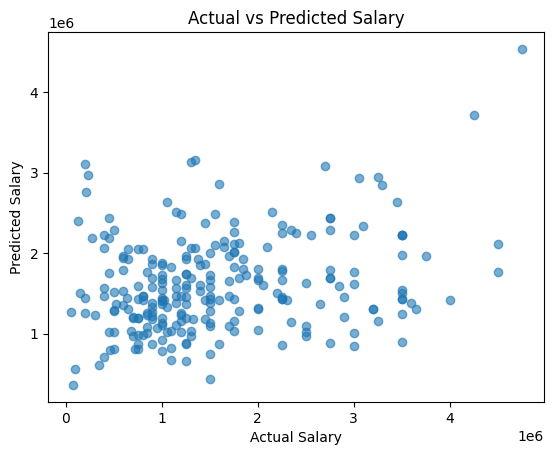

In [51]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.show()
